# Bikeshare Forecast


In [1]:
from datascience import *
import datetime
import warnings
import numpy as np
%matplotlib inline
warnings.filterwarnings("ignore")

##  Bike rentals data for 2011

In [2]:
bikeData = Table.read_table('bikeshare_2011.csv')

In [3]:
bikeData

index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feels_like,hum,windspeed,casual,registered,count
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8
10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0,8,6,14


### The data table contain the following variables:

- year: year (0: 2011, 1:2012) 
- month: month (1 to 12) 
- hour: hour (0 to 23) 
- holiday: if the day is a holiday or not 
- weekday: day of the week, 0 (Sunday) to 6 (Saturday) 
- working: 1 if a day is neither weekend nor holiday, 0 otherwise. 
- weather_type : 
 	1: Clear, Few clouds, Partly cloudy
 	2: Mist, Cloudy 
 	3: Light Snow, Thunderstorm
 	4: Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow, Fog, Apocalypse 
- temp: temperature in Celsius. 
- feels_like: “feels like” temperature in Celsius (accounting for wind chill and humidity)
- humidity: humidity 
- windspeed: wind speed. 

### Finally, the dependent variable is:
- count: total count of bikes rented

### Day of the month

The day of the month is not in the original data table. It can be a useful variable to process and plot the data, so we will add it to the table.

In [4]:
def get_day(s): 
    return datetime.datetime.strptime(s, "%Y-%m-%d").day

bikeData['day'] = bikeData.apply(get_day, 'date')

### Looking at one day of data

Let us see how the number of rentals varies during a day.

In [5]:
def get_one_day_of_bike_counts(month=1, day=1, plot=False): 
    
    bD = bikeData.where(bikeData['month']==month)  # filter data by month
    bDD = bD.where(bD['day']==day) # filter by day of the month
    
    if plot: # optionally, plot a graph
        bDD.select(['hour','count']).plot('hour')
    
    return bDD

index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feels_like,hum,windspeed,casual,registered,count,day
7129,2011-10-25,4,0,10,0,0,2,1,1,0.44,0.4394,0.77,0.1343,4,26,30,25
7130,2011-10-25,4,0,10,1,0,2,1,1,0.44,0.4394,0.77,0.1343,5,6,11,25
7131,2011-10-25,4,0,10,2,0,2,1,1,0.42,0.4242,0.82,0.1343,2,3,5,25
7132,2011-10-25,4,0,10,3,0,2,1,1,0.4,0.4091,0.87,0,1,3,4,25
7133,2011-10-25,4,0,10,4,0,2,1,1,0.38,0.3939,0.87,0.1343,0,5,5,25
7134,2011-10-25,4,0,10,5,0,2,1,1,0.38,0.3939,0.87,0.1343,0,24,24,25
7135,2011-10-25,4,0,10,6,0,2,1,1,0.38,0.3939,0.82,0.1045,3,95,98,25
7136,2011-10-25,4,0,10,7,0,2,1,1,0.4,0.4091,0.76,0.194,15,299,314,25
7137,2011-10-25,4,0,10,8,0,2,1,1,0.44,0.4394,0.72,0,25,383,408,25
7138,2011-10-25,4,0,10,9,0,2,1,1,0.48,0.4697,0.55,0.2239,29,194,223,25


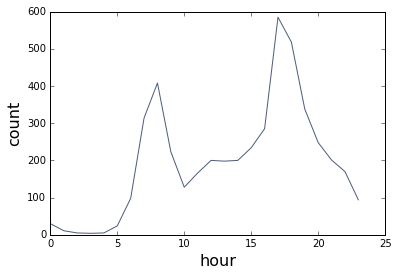

In [6]:
get_one_day_of_bike_counts(month=10, day = 25, plot=True)

### Registered vs Casual

Patterns of bike usage can vary a lot for registered (i.e. regular users who got bikeshare subscription) and casual (leisure riders and tourists using the system only occasionally). Let us visualise the counts for both groups within one week.

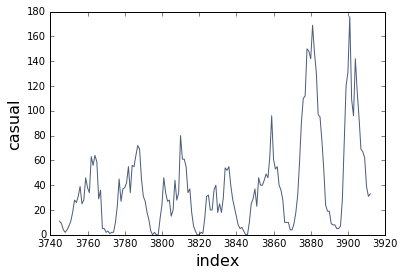

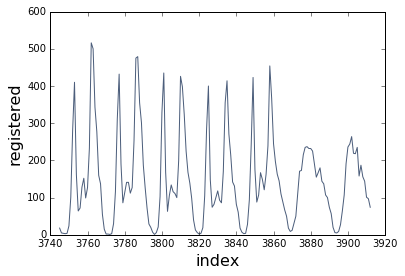

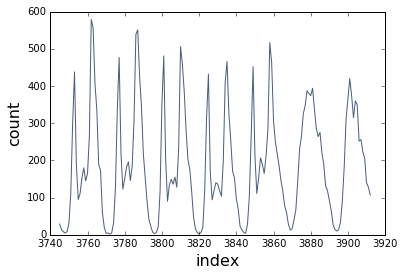

In [6]:
def get_week_number(s):
    '''returns week number in the year'''
    dt = datetime.datetime.strptime(s, "%Y-%m-%d")
    return dt.isocalendar()[1]

nday = 72 # day from the start of the year, nday=72 falls on Monday

# take a subset of data that is 7 days long, starting from nday
bikeShort = bikeData.where(bikeData.apply(get_week_number, 'date')==23) 

bikeShort.select(['index','casual']).plot('index')
bikeShort.select(['index','registered']).plot('index')
bikeShort.select(['index','count']).plot('index')

In [7]:
bikeShort

index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feels_like,hum,windspeed,casual,registered,count,day
3745,2011-06-06,2,0,6,0,0,1,1,1,0.62,0.5909,0.78,0.1343,11,18,29,6
3746,2011-06-06,2,0,6,1,0,1,1,1,0.6,0.5606,0.83,0.1343,9,5,14,6
3747,2011-06-06,2,0,6,2,0,1,1,1,0.58,0.5455,0.88,0.1045,4,4,8,6
3748,2011-06-06,2,0,6,3,0,1,1,1,0.58,0.5455,0.88,0,2,3,5,6
3749,2011-06-06,2,0,6,4,0,1,1,1,0.56,0.5303,0.94,0.1045,4,4,8,6
3750,2011-06-06,2,0,6,5,0,1,1,1,0.56,0.5303,0.88,0.0896,7,24,31,6
3751,2011-06-06,2,0,6,6,0,1,1,1,0.58,0.5455,0.88,0,11,101,112,6
3752,2011-06-06,2,0,6,7,0,1,1,1,0.62,0.5909,0.78,0.1045,18,281,299,6
3753,2011-06-06,2,0,6,8,0,1,1,1,0.64,0.6061,0.73,0.0896,28,410,438,6
3754,2011-06-06,2,0,6,9,0,1,1,1,0.7,0.6515,0.58,0.1642,26,162,188,6


In [8]:
# Reading the 2012 table
bike2012 = Table.read_table('BikePredictions_2012.csv')

In [9]:
bike2012

index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feels_like,hum,windspeed
0,1/7/12,1,1,1,0,0,6,0,1,0.36,0.3485,0.5,0.1642
1,1/7/12,1,1,1,1,0,6,0,1,0.38,0.3939,0.46,0.1642
2,1/7/12,1,1,1,2,0,6,0,1,0.36,0.3636,0.5,0.1045
3,1/7/12,1,1,1,3,0,6,0,1,0.32,0.3333,0.57,0.1045
4,1/7/12,1,1,1,4,0,6,0,1,0.32,0.3333,0.57,0.0896
5,1/7/12,1,1,1,5,0,6,0,1,0.26,0.2727,0.75,0.1045
6,1/7/12,1,1,1,6,0,6,0,1,0.26,0.2727,0.75,0.1045
7,1/7/12,1,1,1,7,0,6,0,1,0.22,0.2273,0.87,0.194
8,1/7/12,1,1,1,8,0,6,0,1,0.24,0.2576,0.75,0.1045
9,1/7/12,1,1,1,9,0,6,0,1,0.22,0.2273,0.8,0.1343


In [10]:
import numpy as np

def rmse(prediction, actual):
    return np.sqrt(np.sum((actual-prediction)**2)/len(actual))

bikeData = bikeData.with_columns('prediction',np.mean(bikeData.column('count')))
my_rmse = rmse(bikeData.column('prediction'),bikeData.column('count'))
print ('The RMSE for these predictions is %.2f'%my_rmse)




bike2012 = bike2012.with_column('prediction',np.mean(bikeData.column('count')))

The RMSE for these predictions is 133.86


In [21]:
bike2012.select(['index','prediction']).with_relabeling('prediction','count').to_csv('stupid_predictions.csv')

index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feels_like,hum,windspeed,count
0,1/7/12,1,1,1,0,0,6,0,1,0.36,0.3485,0.5,0.1642,141.992
1,1/7/12,1,1,1,1,0,6,0,1,0.38,0.3939,0.46,0.1642,141.992
2,1/7/12,1,1,1,2,0,6,0,1,0.36,0.3636,0.5,0.1045,141.992
3,1/7/12,1,1,1,3,0,6,0,1,0.32,0.3333,0.57,0.1045,141.992
4,1/7/12,1,1,1,4,0,6,0,1,0.32,0.3333,0.57,0.0896,141.992
5,1/7/12,1,1,1,5,0,6,0,1,0.26,0.2727,0.75,0.1045,141.992
6,1/7/12,1,1,1,6,0,6,0,1,0.26,0.2727,0.75,0.1045,141.992
7,1/7/12,1,1,1,7,0,6,0,1,0.22,0.2273,0.87,0.194,141.992
8,1/7/12,1,1,1,8,0,6,0,1,0.24,0.2576,0.75,0.1045,141.992
9,1/7/12,1,1,1,9,0,6,0,1,0.22,0.2273,0.8,0.1343,141.992


In [11]:
newBikeData = Table(bikeData.column_labels)
for hour in range(0,24):
    bikeDataHour = bikeData.where('hour',hour)
    bikeDataHour = bikeDataHour.with_column('prediction',np.mean(bikeDataHour.column('count')))
    newBikeData.append(bikeDataHour)
rmse(newBikeData.column('prediction'), newBikeData.column('count'))

93.040974800384816

In [46]:
np.mean(bikeDataMonth.column('count'))

86.081989247311824